# Theory

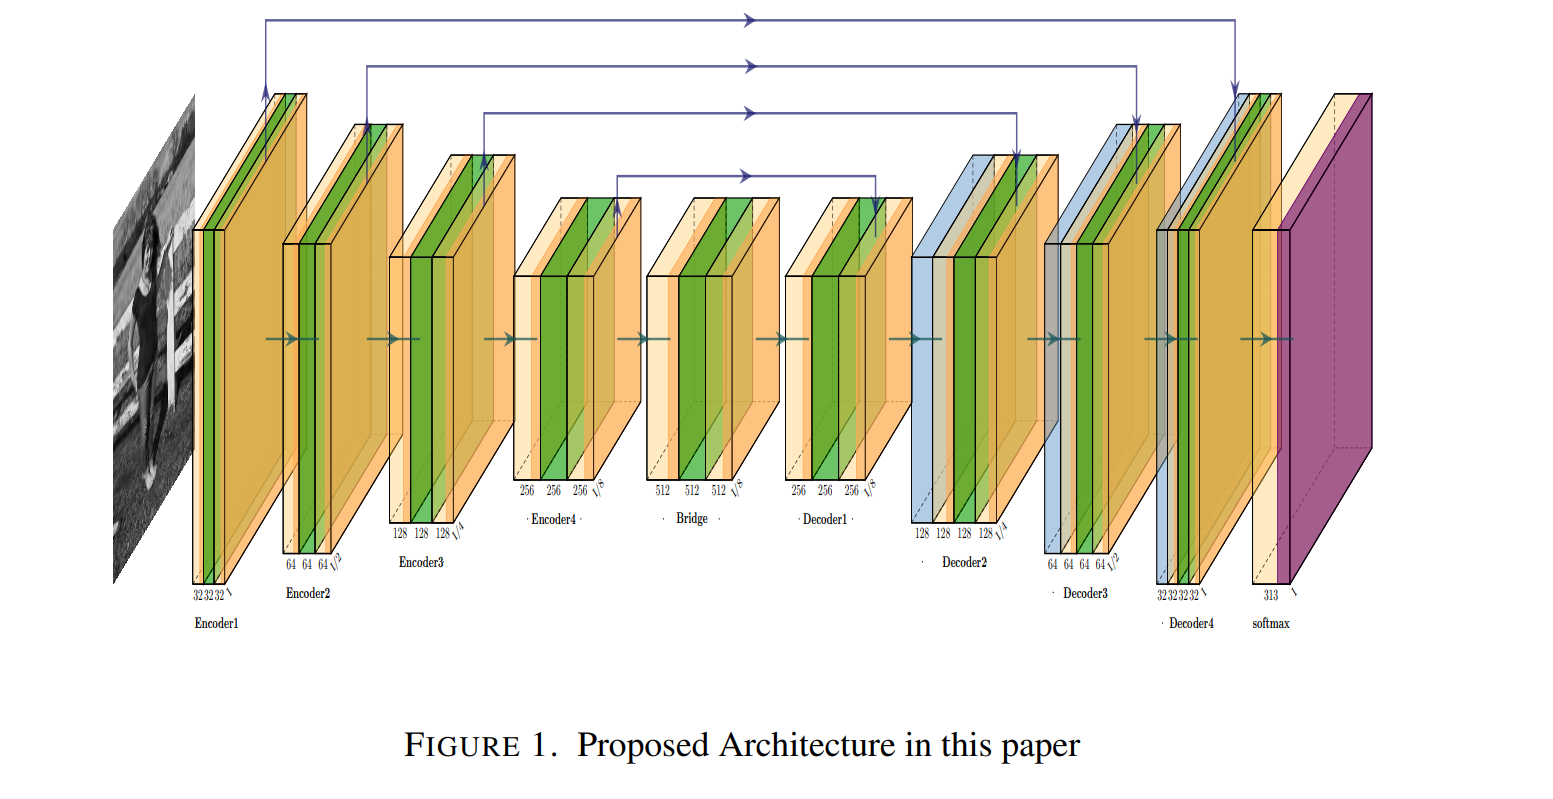

## Encoder :
### The encoder is a feature extraction part and comprises four encoding blocks. To elaborate on the encoding block, the feature map is first reduced by half through a 2-stride convolution. This downscaled feature map then passes through ResBlock (residual block). This process was repeated four times until the size of the feature map was reduced by one-third of the input image. Finally, the feature map of Resblock passes through the convolutional + batchnormalization layer once more. This final feature map is used as the input for the next encoding block. The ReLU activation function was used for all the convolutional layers in the encoder.


## Decoder
### The decoder is a reconstruction part and has a structure similar to that of the encoder. The decoder was composed of four decoding blocks. First, the size of the feature map is expanded through a deconvolutional block. After the long skip-connection, which concatenates with the feature map of the same size in the encoding block to create an expanded feature map, the resulting feature map passes sequentially through the convolutional + batch-normalization layer and ResBlock. Resblocks are used in the same structure as those used in the encoding blocks. The feature map enters convolutional + batch normalization once more. This process was repeated four times until the size of the feature map was equal to the size of the input image. However, for the last convolutional layer of these iterations, the output depth was set to 313. Similar to the encoder, all convolution layers use the Relu activation function but, in the last layer, the Softmax activation function is used.

# Code

## Import 

In [1]:
import tensorflow as tf 
import tensorflow.keras.layers as L

## Trial AE

In [2]:
def autoEncoder():

    # input layer
    input_L = L.Input(shape=(256,256,1), name='Input_Layer')

    # encoder

    x = L.Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same')(input_L)

    x = L.Conv2D(filters=64, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same')(x)
    
    x = L.Conv2D(filters=128, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same')(x)
    
    x = L.Conv2D(filters=256, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same')(x)

    # bottleneck
    latent = L.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same')(x)

    # decoder

    y = L.Conv2DTranspose(filters=256, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same')(latent)

    y = L.Conv2DTranspose(filters=128, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same')(y)
    
    y = L.Conv2DTranspose(filters=64, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same')(y)
    
    y = L.Conv2DTranspose(filters=32, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same')(y)

    # output layer

    output_L = L.Conv2DTranspose(313, (1, 1), activation='softmax', padding='same', name='Output_Layer')(y)

    return tf.keras.models.Model(inputs=input_L, outputs=output_L)

In [3]:
test = autoEncoder()

In [4]:
test.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 256, 256, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 512)       1180160   
                                                                 
 conv2d_transpose (Conv2DTra  (None, 32, 32, 256)      117990

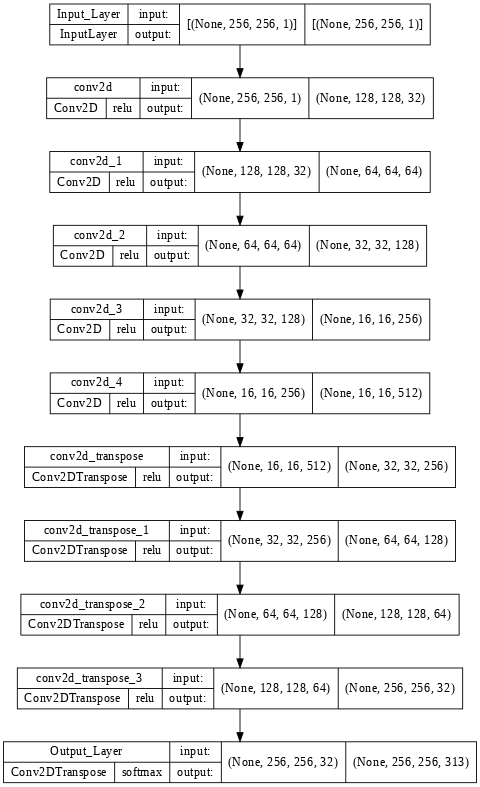

In [5]:
tf.keras.utils.plot_model(
    test, show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=64, show_layer_activations=True
)

# Residual Block

## Encoder :
### The encoder is a feature extraction part and comprises four encoding blocks. To elaborate on the encoding block, the feature map is first reduced by half through a 2-stride convolution. This downscaled feature map then passes through ResBlock (residual block). This process was repeated four times until the size of the feature map was reduced by one-third of the input image. Finally, the feature map of Resblock passes through the convolutional + batchnormalization layer once more. This final feature map is used as the input for the next encoding block. The ReLU activation function was used for all the convolutional layers in the encoder.


-------


## Decoder
### The decoder is a reconstruction part and has a structure similar to that of the encoder. The decoder was composed of four decoding blocks. First, the size of the feature map is expanded through a deconvolutional block. After the long skip-connection, which concatenates with the feature map of the same size in the encoding block to create an expanded feature map, the resulting feature map passes sequentially through the convolutional + batch-normalization layer and ResBlock. Resblocks are used in the same structure as those used in the encoding blocks. The feature map enters convolutional + batch normalization once more. This process was repeated four times until the size of the feature map was equal to the size of the input image. However, for the last convolutional layer of these iterations, the output depth was set to 313. Similar to the encoder, all convolution layers use the Relu activation function but, in the last layer, the Softmax activation function is used.

## Code

In [6]:
def residualBlock(input, filterSize, kernelSize, stride, lname):

    # sending the l1 to the residual block

    r1 = L.Conv2D(filters=filterSize, kernel_size=kernelSize, strides=stride, activation='relu', padding='same', name=lname+'-r1')(input)
    r2 = L.Conv2D(filters=filterSize, kernel_size=kernelSize, strides=stride, activation='relu', padding='same', name=lname+'-r2')(r1)
    r3 = L.Conv2D(filters=filterSize, kernel_size=kernelSize, strides=stride, activation='relu', padding='same', name=lname+'-r3')(r2)

    # adding the skip connection 
    skip = L.concatenate([r1, r3], axis=3, name=lname+'-concat')

    x = L.Conv2D(filters=filterSize, kernel_size=kernelSize, strides=stride, activation='relu', padding='same', name=lname+'-x')(skip)
    
    # batch normalizaiton 
    bn = L.BatchNormalization(name=lname+'-norm')(x)

    return bn

In [7]:
def NN():

    # input layer
    input_L = L.Input(shape=(256,256,1), name='input_layer')
    
    # Encoder Blocks

    # encoding block 1
    e1 = L.Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same', name='c-e1')(input_L)
    e_res1 = residualBlock(e1, 32, (3,3), (1,1), 'eb1')

    # encoding block 2 
    e2 = L.Conv2D(filters=64, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same', name='c-e2')(e_res1)
    e_res2 = residualBlock(e2, 64, (3,3), (1,1), 'eb2')

    # encoding block 3 
    e3 = L.Conv2D(filters=128, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same', name='c-e3')(e_res2)
    e_res3 = residualBlock(e3, 128, (3,3), (1,1), 'eb3')

    # encoding block 4 
    e4 = L.Conv2D(filters=256, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same', name='c-e4')(e_res3)
    e_res4 = residualBlock(e4, 256, (3,3), (1,1), 'eb4')


    # Bottleneck
    latent = L.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same', name='latent')(e_res4)
    e_res5 = residualBlock(latent, 512, (3,3), (1,1), 'res-latent')  


    # Decoding Blocks

    # decoding block 1
    d1 = L.Conv2DTranspose(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', name='ct-d1')(e_res5)
    d_res1 = residualBlock(d1, 256, (3,3), (1,1), 'db1')
    skip1 = L.concatenate([d_res1, e4], axis=3)

    # decoding block 2
    d2 = L.Conv2DTranspose(filters=128, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu', name='ct-d2')(skip1)
    d_res2 = residualBlock(d2, 128, (3,3), (1,1), 'db2')
    skip2 = L.concatenate([d_res2, e3], axis=3)
    
    # decoding block 3
    d3 = L.Conv2DTranspose(filters=64, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu', name='ct-d3')(skip2)
    d_res3 = residualBlock(d3, 64, (3,3), (1,1), 'db3')
    skip3 = L.concatenate([d_res3, e2], axis=3)
    
    # decoding block 4
    d4 = L.Conv2DTranspose(filters=32, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu', name='ct-d4')(skip3)
    d_res4 = residualBlock(d4, 32, (3,3), (1,1), 'db4')
    skip4 = L.concatenate([d_res4, e1], axis=3)

    # output layer
    output_L = L.Conv2DTranspose(filters=2, kernel_size=(3,3), strides=(2,2), padding='same', activation='softmax', name='output_L')(skip4)
    

    return tf.keras.models.Model(inputs=input_L, outputs=output_L)


In [8]:
nn = NN()

In [9]:
nn.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 c-e1 (Conv2D)                  (None, 128, 128, 32  320         ['input_layer[0][0]']            
                                )                                                                 
                                                                                                  
 eb1-r1 (Conv2D)                (None, 128, 128, 32  9248        ['c-e1[0][0]']                   
                                )                                                           

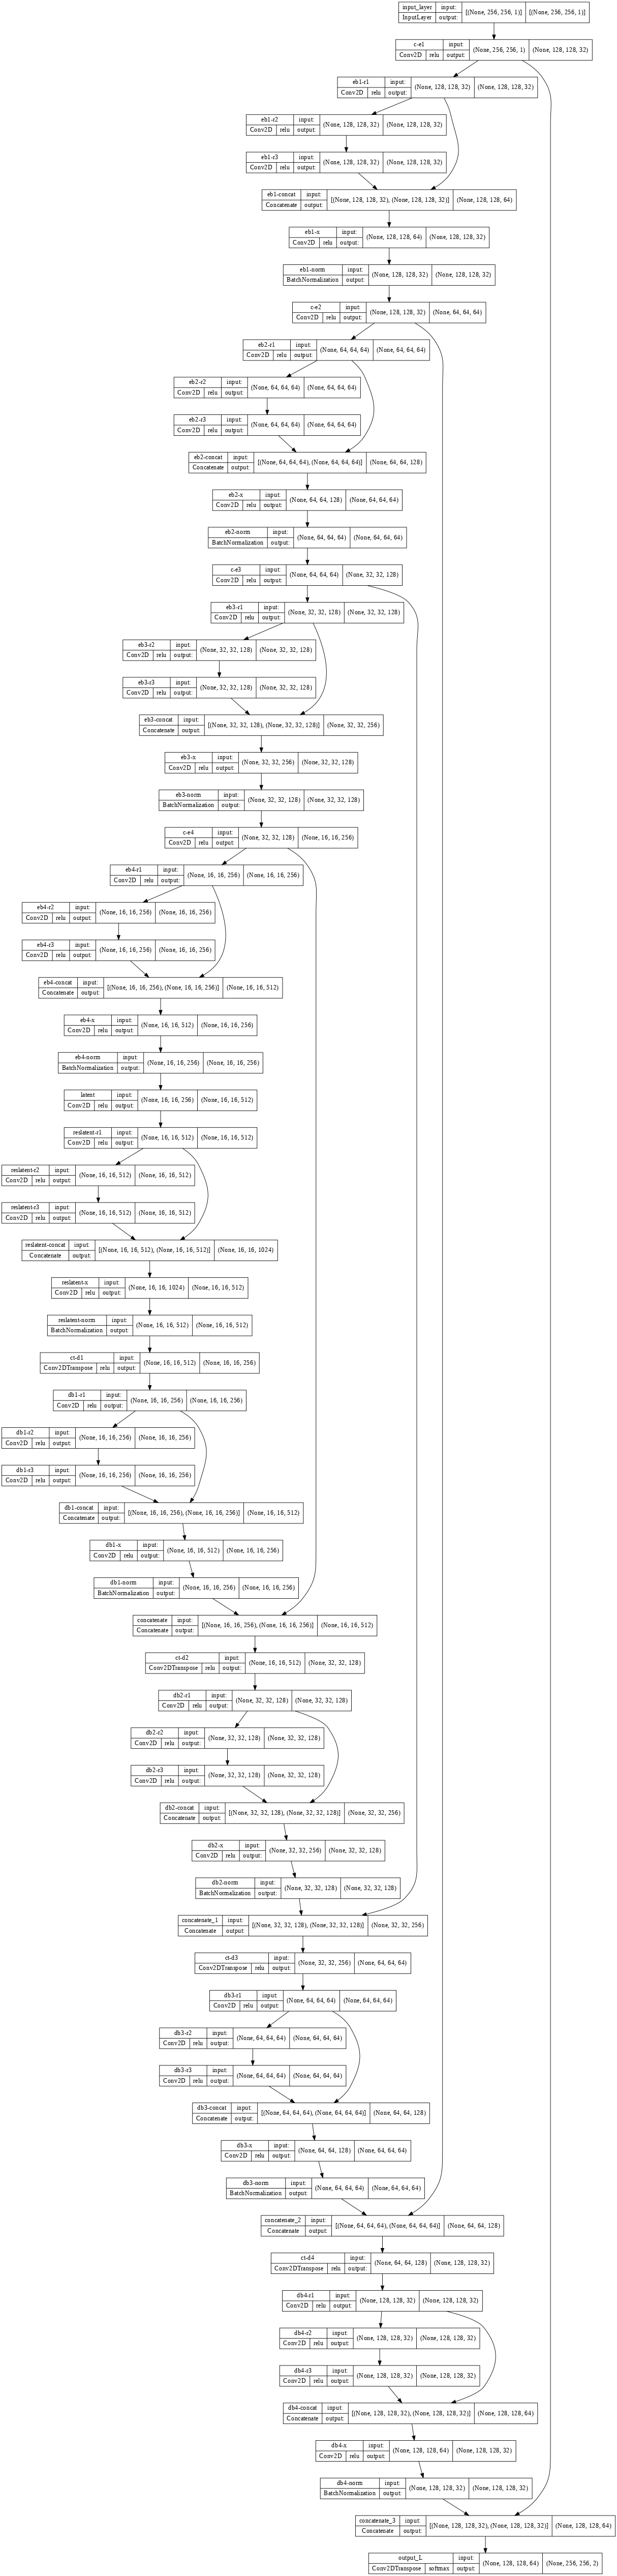

In [10]:
tf.keras.utils.plot_model(
    nn, show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=64, show_layer_activations=True
)

# Unet

In [11]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as k

In [12]:
def unet():
    inputs = Input(shape = (256,256,1))
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs = inputs, outputs = conv10)

    return model

In [13]:
net = unet()

In [14]:
net.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 256, 256, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_6 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d_5[0][0]']               
                                )                                                           

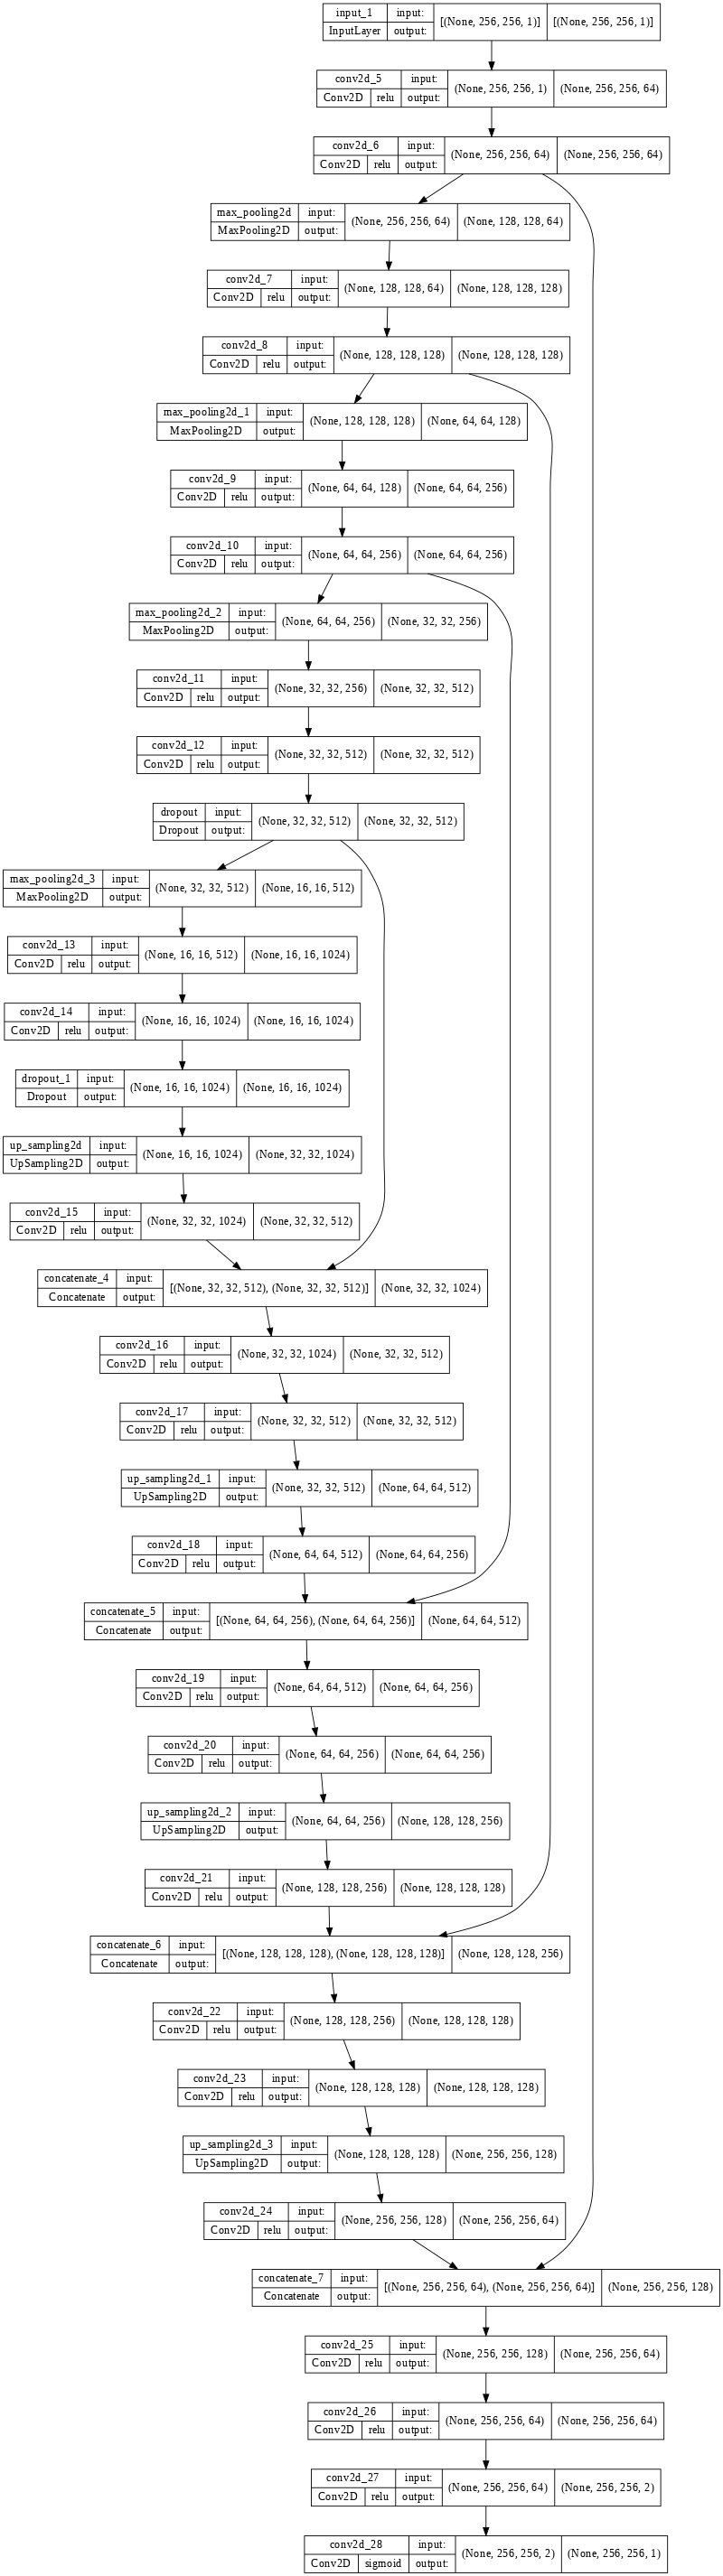

In [15]:
tf.keras.utils.plot_model(
    net, show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=64, show_layer_activations=True
)